In [2]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

Convering data to same image sizes of 224, 224

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt


chickenpox_dir = "/kaggle/input/monkeypox/converted_data/Chickenpox_grayscale"

monkeypox_dir = "/kaggle/input/monkeypox/converted_data/Monkeypox_gray"



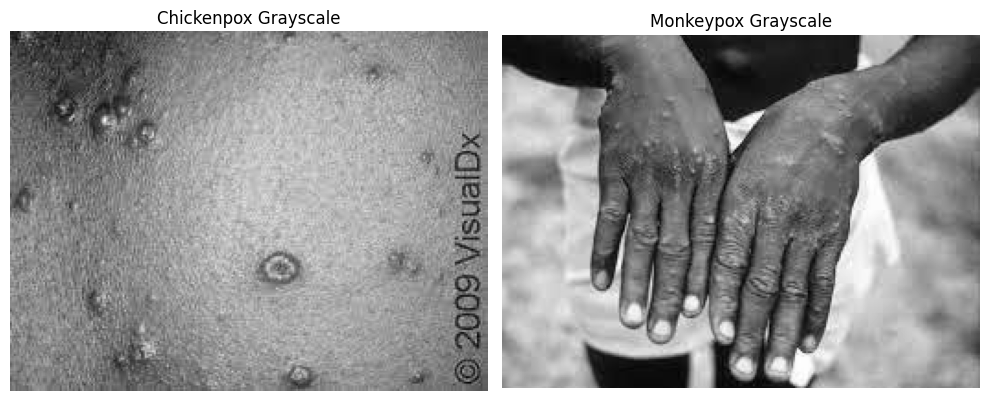

In [7]:
# get the list of image filenames from each directory
chickenpox_files = sorted(os.listdir(chickenpox_dir))
monkeypox_files = sorted(os.listdir(monkeypox_dir))

# check that there is at least one image in each directory
if not chickenpox_files or not monkeypox_files:
    raise ValueError("One of the directories is empty. Please check your dataset paths.")

# read one image from each dataset (using the first image in the sorted list)
chickenpox_image_path = os.path.join(chickenpox_dir, chickenpox_files[0])
monkeypox_image_path = os.path.join(monkeypox_dir, monkeypox_files[0])

chickenpox_img = Image.open(chickenpox_image_path)
monkeypox_img = Image.open(monkeypox_image_path)

# display the images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(chickenpox_img, cmap='gray')
plt.title('Chickenpox Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(monkeypox_img, cmap='gray')
plt.title('Monkeypox Grayscale')
plt.axis('off')

plt.tight_layout()
plt.show()


# since VGG requires 224, 224 image sizes ...

Saving them on kaggle/working as kaggle/input is read only

In [8]:
import os
from PIL import Image

# define the paths to original (already grayscale) datasets
chickenpox_input_dir = "/kaggle/input/monkeypox/converted_data/Chickenpox_grayscale"
monkeypox_input_dir = "/kaggle/input/monkeypox/converted_data/Monkeypox_gray"

# define the output paths in the Kaggle working directory
chickenpox_output_dir = "/kaggle/working/resized/Chickenpox_grayscale"
monkeypox_output_dir = "/kaggle/working/resized/Monkeypox_gray"

# create the output directories if they don't already exist
os.makedirs(chickenpox_output_dir, exist_ok=True)
os.makedirs(monkeypox_output_dir, exist_ok=True)

# helper function to resize and save images
def resize_images(input_dir, output_dir, target_size=(224, 224)):
    for filename in os.listdir(input_dir):
        # process only image files
        if filename.lower().endswith(('.jpg')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            
            # open the image
            with Image.open(input_path) as img:
                # convert to RGB if your model requires 3 channels
                img_rgb = img.convert("RGB")
                # resize the image to 224x224
                resized_img = img_rgb.resize(target_size)
                # save the resized image in the output directory
                resized_img.save(output_path)
                
            print(f"Resized and saved: {output_path}")

# process Chickenpox images
resize_images(chickenpox_input_dir, chickenpox_output_dir)

# process Monkeypox images
resize_images(monkeypox_input_dir, monkeypox_output_dir)


Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_18.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_30.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_26.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_16.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_21.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_15.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_28.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_38.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/1.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_23.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_5.jpg
Resized and saved: /kaggle/working/resized/Chickenpox_grayscale/chicken_pox_13.jpg
Resized and saved:

In [12]:
# sanity check

import os

# define the output directories
chickenpox_output_dir = "/kaggle/working/resized/Chickenpox_grayscale"
monkeypox_output_dir = "/kaggle/working/resized/Monkeypox_gray"

# kist only image files
chickenpox_files = [f for f in os.listdir(chickenpox_output_dir) if f.lower().endswith(('.jpg'))]
monkeypox_files = [f for f in os.listdir(monkeypox_output_dir) if f.lower().endswith(('.jpg'))]

# print the counts
print("Number of Chickenpox images resized:", len(chickenpox_files))
print("Number of Monkeypox images resized:", len(monkeypox_files))

# expected counts
expected_chickenpox_count =  47
expected_monkeypox_count =   43

print("---------------------------------------------------")
# check if counts match expected values
if len(chickenpox_files) == expected_chickenpox_count:
    print("All Chickenpox images have been resized and saved.")
else:
    print("Warning: Some Chickenpox images might be missing.")

if len(monkeypox_files) == expected_monkeypox_count:
    print("All Monkeypox images have been resized and saved.")
else:
    print("Warning: Some Monkeypox images might be missing.")


Number of Chickenpox images resized: 47
Number of Monkeypox images resized: 43
---------------------------------------------------
All Chickenpox images have been resized and saved.
All Monkeypox images have been resized and saved.


Displaying Chickenpox images:


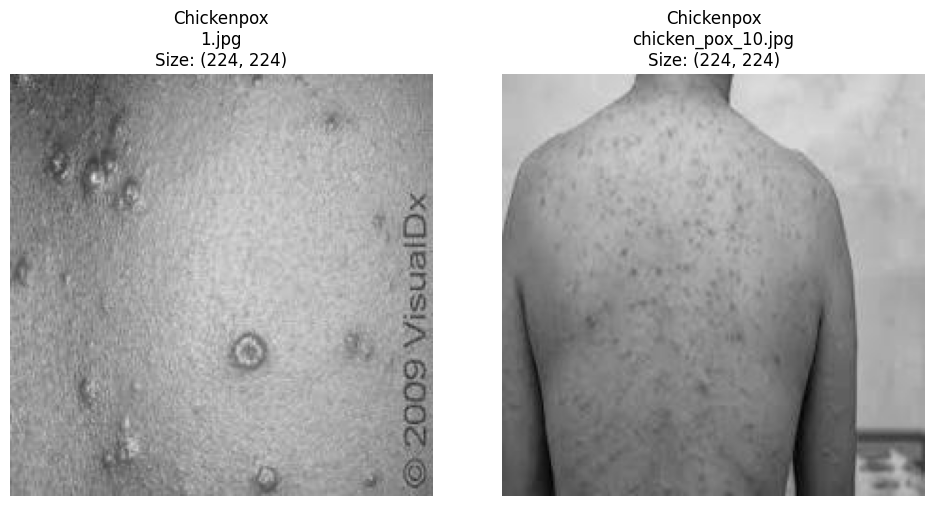

Displaying Monkeypox images:


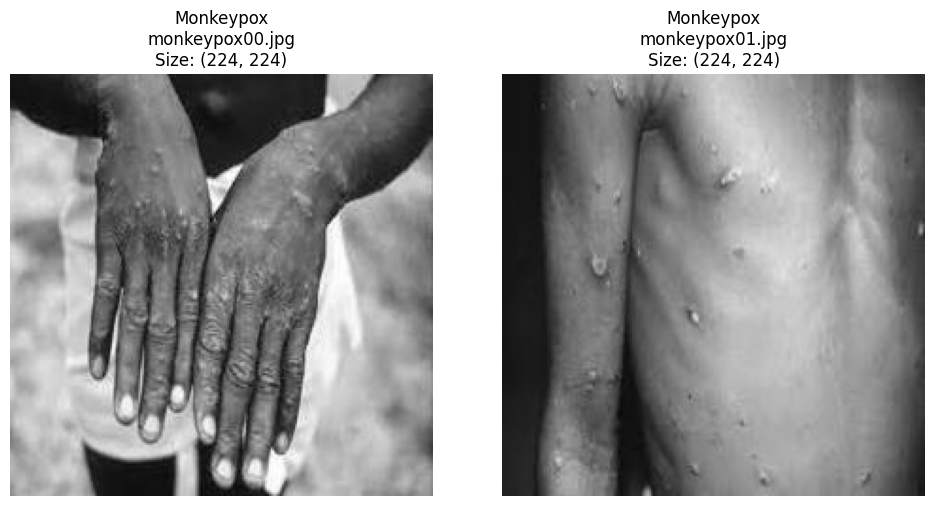

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_with_size(folder, title_prefix, num_images=2):
    # filter for .jpg files only
    files = sorted([f for f in os.listdir(folder) if f.lower().endswith('.jpg')])
    selected_files = files[:num_images]
    
    # Set up the plot
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 5, 5))
    if num_images == 1:
        axs = [axs]
    
    for i, filename in enumerate(selected_files):
        file_path = os.path.join(folder, filename)
        with Image.open(file_path) as img:
            size = img.size  # size is a tuple (width, height)
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f"{title_prefix}\n{filename}\nSize: {size}")
    
    plt.tight_layout()
    plt.show()


chickenpox_folder = "/kaggle/working/resized/Chickenpox_grayscale"
monkeypox_folder = "/kaggle/working/resized/Monkeypox_gray"

print("Displaying Chickenpox images:")
display_images_with_size(chickenpox_folder, "Chickenpox")

print("Displaying Monkeypox images:")
display_images_with_size(monkeypox_folder, "Monkeypox")


##  Study one:

Batch size = [5, 10, 15, 20]

Learning rate = [0.1, 0.01, 0.001]

Number of Epochs = [30, 35, 40, 45]



Using the grid search method following parameters are identified as the most optimal ones:

- Batch size = 10

- Learning rate = 0.001

- Number of Epochs = 35

## converting to tensors and having dataloaders ...

In [29]:
# trying manual slicing

import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


# --- DIRECTORIES ---
chickenpox_dir = "/kaggle/working/resized/Chickenpox_grayscale"
monkeypox_dir = "/kaggle/working/resized/Monkeypox_gray"

# --- COLLECT FILE PATHS ---
chickenpox_files = sorted([
    os.path.join(chickenpox_dir, f)
    for f in os.listdir(chickenpox_dir)
    if f.lower().endswith('.jpg')
])
monkeypox_files = sorted([
    os.path.join(monkeypox_dir, f)
    for f in os.listdir(monkeypox_dir)
    if f.lower().endswith('.jpg')
])

print("Total Chickenpox images:", len(chickenpox_files))
print("Total Monkeypox images:", len(monkeypox_files))
print("Total images:", len(chickenpox_files) + len(monkeypox_files))

# --- MANUAL SPLITS BASED ON STUDY ONE ---
# --- 80% train and 20% test -------
# Chickenpox: 38 train, 9 test
chickenpox_train_files = chickenpox_files[:38]
chickenpox_test_files  = chickenpox_files[38:]

# Monkeypox: 34 train, 9 test
monkeypox_train_files = monkeypox_files[:34]
monkeypox_test_files  = monkeypox_files[34:]

# --- COMBINE INTO TRAIN/TEST SETS ---
train_files  = chickenpox_train_files + monkeypox_train_files
train_labels = [0]*len(chickenpox_train_files) + [1]*len(monkeypox_train_files)

test_files  = chickenpox_test_files + monkeypox_test_files
test_labels = [0]*len(chickenpox_test_files) + [1]*len(monkeypox_test_files)

print("\nExpected Distribution:")
print("  Train set: 38 Chickenpox + 34 Monkeypox = 72")
print("  Test set :  9 Chickenpox +  9 Monkeypox = 18")

# --- DATASET CLASS ---
class MonkeyChickenDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        label = self.labels[idx]
        
        # Open the image (already 224x224, RGB)
        image = Image.open(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# --- NORMALIZATION IF USING PRETRAINED VGG ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- CREATE DATASETS ---
train_dataset = MonkeyChickenDataset(train_files, train_labels, transform=transform)
test_dataset  = MonkeyChickenDataset(test_files,  test_labels,  transform=transform)

# count distribution in each subset
train_chickenpox_count = sum(1 for lbl in train_dataset.labels if lbl == 0)
train_monkeypox_count  = sum(1 for lbl in train_dataset.labels if lbl == 1)
test_chickenpox_count  = sum(1 for lbl in test_dataset.labels if lbl == 0)
test_monkeypox_count   = sum(1 for lbl in test_dataset.labels if lbl == 1)


# display results in a neat table
print("\nActual Distribution:")
print("  +-----------+-------+------------+-----------+")
print("  |   Set     | Total | Chickenpox | Monkeypox |")
print("  +-----------+-------+------------+-----------+")
print(f"  | Training  |  {len(train_dataset):<5} | {train_chickenpox_count:<10} | {train_monkeypox_count:<9} |")
print("  +-----------+-------+------------+-----------+")
print(f"  | Testing   |  {len(test_dataset):<5} | {test_chickenpox_count:<10} | {test_monkeypox_count:<9} |")
print("  +-----------+-------+------------+-----------+")

# --- CREATE DATALOADERS ---
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True,  num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=10, shuffle=False, num_workers=2)

for images, labels in train_loader:
    print("\nExample batch shapes:", images.shape, labels.shape)
    print("Example labels:", labels)
    break


Total Chickenpox images: 47
Total Monkeypox images: 43
Total images: 90

Expected Distribution:
  Train set: 38 Chickenpox + 34 Monkeypox = 72
  Test set :  9 Chickenpox +  9 Monkeypox = 18

Actual Distribution:
  +-----------+-------+------------+-----------+
  |   Set     | Total | Chickenpox | Monkeypox |
  +-----------+-------+------------+-----------+
  | Training  |  72    | 38         | 34        |
  +-----------+-------+------------+-----------+
  | Testing   |  18    | 9          | 9         |
  +-----------+-------+------------+-----------+

Example batch shapes: torch.Size([10, 3, 224, 224]) torch.Size([10])
Example labels: tensor([1, 1, 0, 0, 0, 1, 1, 1, 1, 0])


# What the paper expects! 

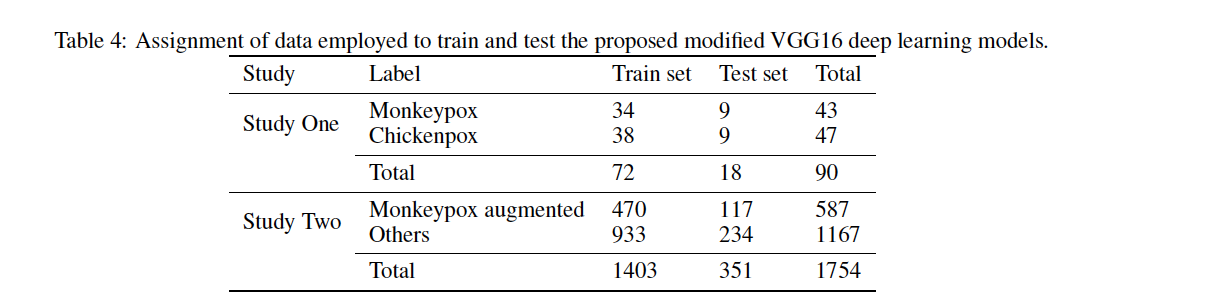
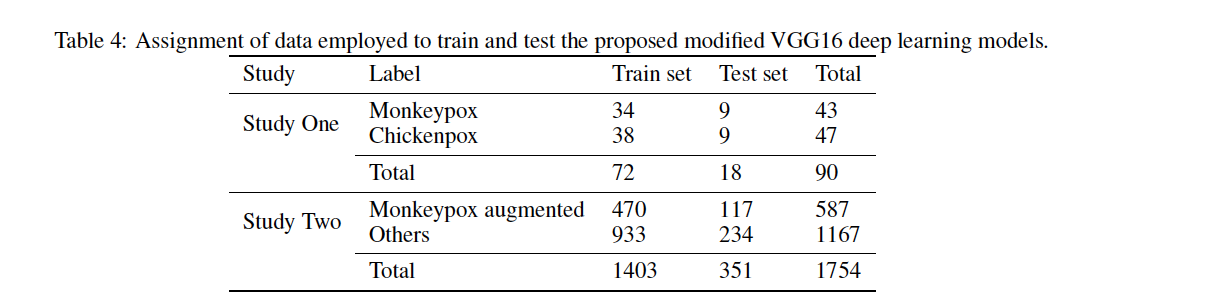

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# using pretrained VGG16
model = models.vgg16(pretrained=True)
# # freeze early layers (optional, if you want transfer learning)
# for param in model.features.parameters():
#     param.requires_grad = False

# replace the final classifier layer for 2 classes
model.classifier[-1] = nn.Linear(in_features=4096, out_features=2)

# move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# print("Device: ", DEVICE)
print("Device: ", device)

Device:  cuda


Loss, Optimizer, and Scheduler

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# learning rate scheduler
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [41]:
import wandb

wandb.login(key="43ba0e8a2e5913526b62f3733783d0f493c6c39a") 

# Create your wandb run
run = wandb.init(
    name    = "dnyaboke_project", ### Wandb creates random run names if you skip this field, we recommend you give useful names
    reinit  = True, ### Allows reinitalizing runs when you re-run this cell
    entity = 'delta-group-50',
    #id     = "", ### Insert specific run id here if you want to resume a previous run
    #resume = "must", ### You need this to resume previous runs, but comment out reinit = True when using this
    project = "final-project-ablations", ### Project should be created in your wandb account
    # config  = config ### Wandb Config for your run
)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [43]:
config = {
    'batch_size': 10,
    'lr': 0.001,
    'epochs': 35, # 51, # 26, # 23, # 3, # 7, # 20, # 20 epochs is recommended ONLY for the early submission - you will have to train for much longer typically.
    # 'num_classes': 8631, #Dataset contains 8631 classes for classification, reduce this number if you want to train on a subset, but only for train dataset and not on val dataset
    # 'cls_data_dir': "/kaggle/input/11785-hw-2-p-2-face-verification-spring-2025/HW2p2_S25/cls_data", #TODO: Provide path of classification directory
    # 'ver_data_dir': "/kaggle/input/11785-hw-2-p-2-face-verification-spring-2025/HW2p2_S25/ver_data", #TODO: Provide path of verification directory
    # 'val_pairs_file': "/kaggle/input/11785-hw-2-p-2-face-verification-spring-2025/HW2p2_S25/val_pairs.txt", #TODO: Provide path of text file containing val pairs for verification
    # 'test_pairs_file': "/kaggle/input/11785-hw-2-p-2-face-verification-spring-2025/HW2p2_S25/test_pairs.txt", #TODO: Provide path of text file containing test pairs for verification
    'checkpoint_dir': "/kaggle/working/checkpoints", #TODO: Checkpoint directory
    'augument': True, # False
    # Include other parameters as needed.
}

In [44]:
import os
checkpoint_dir = config['checkpoint_dir']

# Create the directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

In [45]:
def save_model(model, optimizer, scheduler, metrics, epoch, path):
    torch.save(
        {'model_state_dict'         : model.state_dict(),
         'optimizer_state_dict'     : optimizer.state_dict(),
         # 'scheduler_state_dict'     : scheduler.state_dict(),
         'metric'                   : metrics,
         'epoch'                    : epoch},
         path)


def load_model(model, optimizer=None, scheduler=None, path='./checkpoint.pth'):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    else:
        optimizer = None
    if scheduler is not None:
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    else:
        scheduler = None
    epoch = checkpoint['epoch']
    metrics = checkpoint['metric']
    return model, optimizer, scheduler, epoch, metrics

## Experiments

In [46]:
num_epochs = 35

train_acc_history = []
train_loss_history = []
val_acc_history = []
val_loss_history = []

for epoch in range(num_epochs):
    ######################
    #      Training
    ######################
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # accumulate stats
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_epoch_loss = running_loss / total
    train_epoch_acc = correct / total
    train_loss_history.append(train_epoch_loss)
    train_acc_history.append(train_epoch_acc)
    
    ######################
    #      Validation
    ######################
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_loss_history.append(val_epoch_loss)
    val_acc_history.append(val_epoch_acc)
    
    # update scheduler (if used)
    # scheduler.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}]"
          f"  Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.4f}"
          f"  |  Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")


Epoch [1/35]  Train Loss: 0.7056, Train Acc: 0.5417  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [2/35]  Train Loss: 0.7821, Train Acc: 0.4444  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [3/35]  Train Loss: 0.7411, Train Acc: 0.4861  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [4/35]  Train Loss: 0.7509, Train Acc: 0.4306  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [5/35]  Train Loss: 0.7168, Train Acc: 0.5000  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [6/35]  Train Loss: 0.7145, Train Acc: 0.5417  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [7/35]  Train Loss: 0.6860, Train Acc: 0.5417  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [8/35]  Train Loss: 0.7382, Train Acc: 0.4306  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [9/35]  Train Loss: 0.7290, Train Acc: 0.5278  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [10/35]  Train Loss: 0.7201, Train Acc: 0.5139  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [11/35]  Train Loss: 0.7254, Train Acc: 0.5139  |  Val Loss: 0.7083, Val Acc: 0.5000
Epoch [1

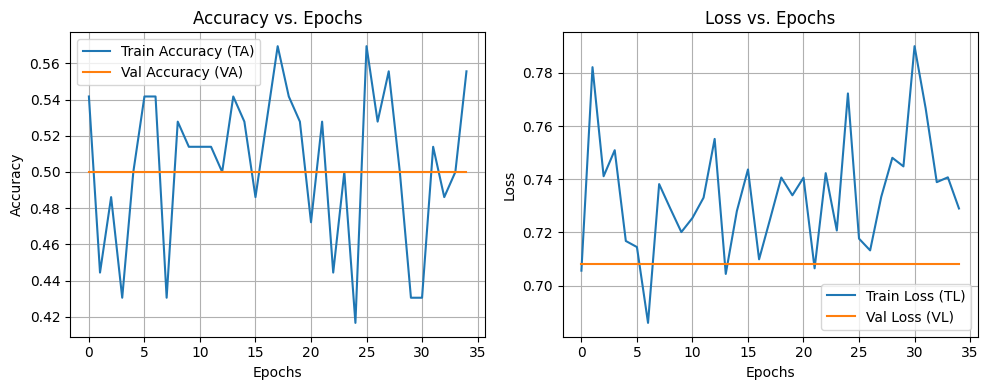

In [47]:
# plot Accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(num_epochs), train_acc_history, label='Train Accuracy (TA)')
plt.plot(range(num_epochs), val_acc_history,   label='Val Accuracy (VA)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)

# plot Loss
plt.subplot(1,2,2)
plt.plot(range(num_epochs), train_loss_history, label='Train Loss (TL)')
plt.plot(range(num_epochs), val_loss_history,   label='Val Loss (VL)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [48]:
from sklearn.metrics import confusion_matrix

def evaluate_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # compute confusion matrix: labels = 0 or 1
    cm = confusion_matrix(all_labels, all_preds, labels=[0, 1])
    # cm = [[TN, FP],
    #       [FN, TP]]
    tn, fp, fn, tp = cm.ravel()
    
    accuracy    = (tp + tn) / (tp + tn + fp + fn)
    precision   = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall      = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score    = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    sensitivity = recall  # same as recall for positive class
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "sensitivity": sensitivity,
        "specificity": specificity
    }


In [49]:
train_metrics = evaluate_metrics(model, train_loader)
test_metrics  = evaluate_metrics(model, test_loader)

print("\nTRAIN METRICS:")
for k, v in train_metrics.items():
    print(f"{k.capitalize()}: {v:.3f}")

print("\nTEST METRICS:")
for k, v in test_metrics.items():
    print(f"{k.capitalize()}: {v:.3f}")



TRAIN METRICS:
Accuracy: 0.500
Precision: 0.455
Recall: 0.294
F1_score: 0.357
Sensitivity: 0.294
Specificity: 0.684

TEST METRICS:
Accuracy: 0.500
Precision: 0.500
Recall: 0.444
F1_score: 0.471
Sensitivity: 0.444
Specificity: 0.556


In [50]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def compute_roc_auc(model, data_loader):
    """
    Computes the FPR, TPR, and AUC for a binary classification model.
    
    model: your trained PyTorch model
    data_loader: DataLoader for either the train or test set
    
    Returns:
      fpr, tpr, auc_score
    """
    model.eval()
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # forward pass
            outputs = model(images)  # shape: [batch_size, 2]
            
            # convert logits to probabilities (softmax)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # probability of class "1"
            
            # store results on CPU
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # use sklearn's roc_curve to compute FPR/TPR
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs, pos_label=1)
    auc_score = auc(fpr, tpr)
    
    return fpr, tpr, auc_score


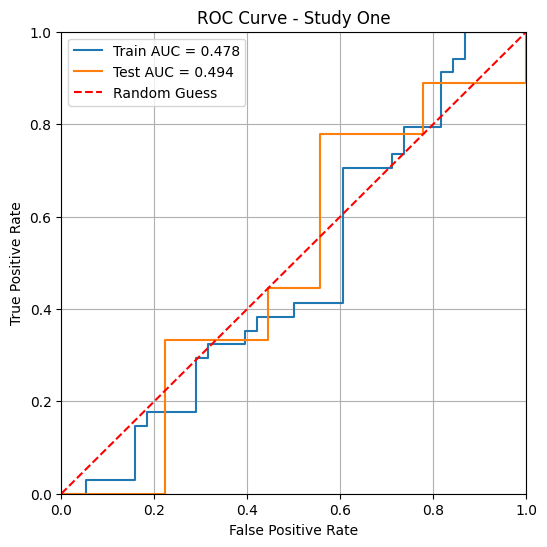

Train AUC: 0.478
Test AUC : 0.494


In [51]:
# evaluate ROC on training set
train_fpr, train_tpr, train_auc = compute_roc_auc(model, train_loader)

# evaluate ROC on test set
test_fpr, test_tpr, test_auc = compute_roc_auc(model, test_loader)

# plot both curves
plt.figure(figsize=(6, 6))
plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.3f}")
plt.plot(test_fpr, test_tpr, label=f"Test AUC = {test_auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Study One")
plt.legend()
plt.grid(True)
plt.show()

print(f"Train AUC: {train_auc:.3f}")
print(f"Test AUC : {test_auc:.3f}")
